# Vessel Classification

#### Oct 25, 2020
#### Joseph Sepich

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
dir_path = './data/AIS/'
all_files = os.listdir(dir_path)
all_files = [dir_path + f for f in all_files]
included_dates = ['01_01', '01_02', '01_03', '01_04', '01_05']

other_dir = './data/AIS_sub/'
first = True
for f in all_files:
    read = False
    for term in included_dates:
        if term in f:
            read = True
            break
    if read:
        temp = pd.read_csv(f)
        temp = temp[temp.VesselType.isin([37,51,35,30])]
        if first:
            temp.to_csv(other_dir + 'binary_set.csv',index=False)
            first = False
        else:
            temp.to_csv(other_dir + 'binary_set.csv',index=False,header=False,mode='a')
del temp

In [51]:
ais = pd.read_csv(other_dir + 'binary_set.csv')
ais.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,368066040,2019-01-01T00:00:05,30.33668,-88.29042,6.6,201.1,202.0,BOSSMAN,IMO0000000,WDK5560,30.0,NaN,30.0,9.0,NaN,NaN,B
1,368045480,2019-01-01T00:00:05,47.65037,-122.32944,0.0,176.2,511.0,CAREYD AWAY,IMO0000000,NaN,37.0,NaN,18.0,6.0,NaN,NaN,B
2,367138430,2019-01-01T00:00:06,38.95835,-74.86710,0.0,-140.1,511.0,AMY MARIE,IMO7932111,WUS2556,30.0,7.0,27.0,7.0,NaN,30.0,B
3,367776890,2019-01-01T00:00:04,29.41973,-84.90810,2.9,-191.2,511.0,LONI LYNN,NaN,WDJ4354,30.0,NaN,19.0,NaN,NaN,NaN,B
4,338207465,2019-01-01T00:00:04,29.91724,-81.30812,0.0,-101.9,511.0,J SEAS,NaN,NaN,37.0,NaN,15.0,5.0,NaN,NaN,B


In [52]:
ais.shape

(7881571, 17)

# EDA

In [53]:
# unique vessel names
ais.VesselName.nunique()

5867

array([[<AxesSubplot:title={'center':'SOG'}>]], dtype=object)

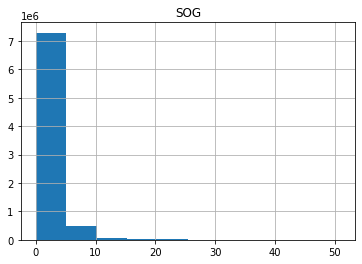

In [54]:
ais[ais.SOG >= 0].hist('SOG')

array([[<AxesSubplot:title={'center':'SOG'}>]], dtype=object)

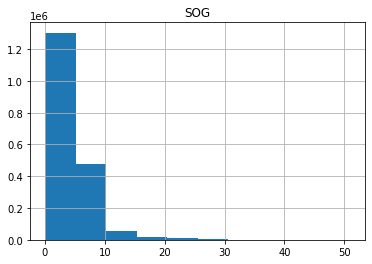

In [55]:
ais[ais.SOG > 0].hist('SOG')

Try a heatmap of reports.

In [56]:
count_p = len(ais[ais.VesselType == 37])
count_s = len(ais[ais.VesselType == 51])
count_mil = len(ais[ais.VesselType == 35])
count_fish = len(ais[ais.VesselType == 30])
count_tot = count_mil + count_p + count_s + count_fish
print('Percentage 37: ', count_p / count_tot)
print('Percentage 51: ', count_s / count_tot)
print('Percentage 35: ', count_mil / count_tot)
print('Percentage 30: ', count_fish / count_tot)

Percentage 37:  0.6647537654612259
Percentage 51:  0.003259121817211315
Percentage 35:  0.002139040554224532
Percentage 30:  0.3298480721673382


# Base Models

## Decision Tree

In [57]:
# import
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split

In [58]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
dt_model = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(167.4, 190.26, 'X[1] <= -123.705\ngini = 0.449\nsamples = 5517099\nvalue = [1818436, 11853, 3668858, 17952]'),
 Text(83.7, 135.9, 'X[1] <= -123.885\ngini = 0.098\nsamples = 751587\nvalue = [712734, 2928, 35816, 109]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 60.753\ngini = 0.088\nsamples = 728900\nvalue = [695472, 2928, 30461, 39]'),
 Text(20.925, 27.180000000000007, 'gini = 0.086\nsamples = 728179\nvalue = [695472, 2928, 29740, 39]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 721\nvalue = [0, 0, 721, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 48.374\ngini = 0.365\nsamples = 22687\nvalue = [17262, 0, 5355, 70]'),
 Text(104.625, 27.180000000000007, 'gini = 0.181\nsamples = 17997\nvalue = [16188, 0, 1809, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.376\nsamples = 4690\nvalue = [1074, 0, 3546, 70]'),
 Text(251.10000000000002, 135.9, 'X[1] <= -76.467\ngini = 0.365\nsamples = 4765512\nvalue = [1105702, 8925, 3633042, 17843]'),
 Text(

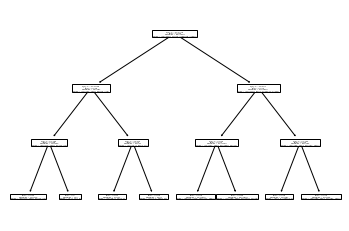

In [59]:
plot_tree(dt_model)

In [60]:
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dt_model.score(X_train, Y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))
print('F1 score of decision tree classifier on test set: {:.2f}'.format(f1_score(Y_test, dt_model.predict(X_test), average='weighted')))

Accuracy of decision tree classifier on train set: 0.83
Accuracy of decision tree classifier on test set: 0.83
F1 score of decision tree classifier on test set: 0.82


In [61]:
from sklearn.metrics import confusion_matrix
Y_pred = dt_model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 460888       0  320397       0]
 [   2968       0    2038       0]
 [  58967       0 1511479       0]
 [    726       0    7009       0]]


In [62]:
features = ['SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
dt_model = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(167.4, 190.26, 'X[0] <= 1.15\ngini = 0.449\nsamples = 5517099\nvalue = [1818436, 11853, 3668858, 17952]'),
 Text(83.7, 135.9, 'X[1] <= 435.0\ngini = 0.414\nsamples = 4821644\nvalue = [1364558, 11355, 3430876, 14855]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 0.05\ngini = 0.48\nsamples = 782008\nvalue = [294260, 3012, 481260, 3476]'),
 Text(20.925, 27.180000000000007, 'gini = 0.49\nsamples = 689850\nvalue = [274008, 2888, 409580, 3374]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.347\nsamples = 92158\nvalue = [20252, 124, 71680, 102]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.45\ngini = 0.397\nsamples = 4039636\nvalue = [1070298, 8343, 2949616, 11379]'),
 Text(104.625, 27.180000000000007, 'gini = 0.395\nsamples = 3971311\nvalue = [1046369, 8285, 2905495, 11162]'),
 Text(146.475, 27.180000000000007, 'gini = 0.46\nsamples = 68325\nvalue = [23929, 58, 44121, 217]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 10.55\ngini = 0.457\nsamples = 695455\nvalue =

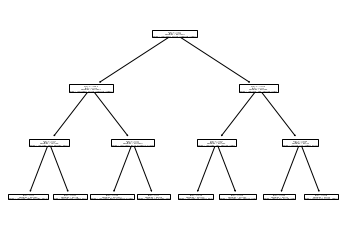

In [63]:
plot_tree(dt_model)

In [64]:
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dt_model.score(X_train, Y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))
print('F1 score of decision tree classifier on test set: {:.2f}'.format(f1_score(Y_test, dt_model.predict(X_test), average='weighted')))

Accuracy of decision tree classifier on train set: 0.71
Accuracy of decision tree classifier on test set: 0.71
F1 score of decision tree classifier on test set: 0.66


In [65]:
from sklearn.metrics import confusion_matrix
Y_pred = dt_model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 190140       0  591145       0]
 [    151       0    4855       0]
 [  81720       0 1488726       0]
 [    591       0    7144       0]]


## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [68]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2,3
0,SOG,0.387555,-1.102303,0.268582,0.446166
1,Heading,0.000453,-0.001015,0.001452,-0.000890


Implies that heading by itself is not much of an indicator, whereas speed does have some correlation with each vessel type.

In [75]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
print('F1 score of logistic regresssion classifier on test set: {:.2f}'.format(f1_score(Y_test, logreg.predict(X_test), average='weighted')))

Accuracy of logistic regression classifier on train set: 0.74
Accuracy of logistic regression classifier on test set: 0.74
F1 score of logistic regresssion classifier on test set: 0.72


In [70]:
from sklearn.metrics import confusion_matrix
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[  69763       0  711522       0]
 [    109       0    4897       0]
 [  48120      18 1522308       0]
 [    888       0    6847       0]]


In [71]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [72]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2,3
0,LAT,-0.059744,0.054555,-0.130688,0.135878
1,LON,-0.057180,0.025543,-0.066400,0.098036
2,SOG,0.047171,-0.029971,-0.098593,0.081393
3,Heading,0.000280,-0.004268,0.003609,0.000379


From this I would interpret that the way we modeled this, position is easier/more useful in determining vessel type.

In [76]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
print('F1 score of logistic regresssion classifier on test set: {:.2f}'.format(f1_score(Y_test, logreg.predict(X_test), average='weighted')))

Accuracy of logistic regression classifier on train set: 0.74
Accuracy of logistic regression classifier on test set: 0.74
F1 score of logistic regresssion classifier on test set: 0.72


In [77]:
from sklearn.metrics import confusion_matrix
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 301669       0  479616       0]
 [   1396       0    3610       0]
 [ 111950       0 1458496       0]
 [   2523       0    5212       0]]


## Boosted

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [80]:
print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(ada.score(X_train, Y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(X_test, Y_test)))
print('F1 score of AdaBoost classifier on test set: {:.2f}'.format(f1_score(Y_test, ada.predict(X_test), average='weighted')))

Accuracy of AdaBoost classifier on train set: 0.81
Accuracy of AdaBoost classifier on test set: 0.81
F1 score of AdaBoost classifier on test set: 0.81


In [81]:
from sklearn.metrics import confusion_matrix
Y_pred = ada.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 516372       0  264890      23]
 [   1669       0    3328       9]
 [ 151439       0 1410104    8903]
 [    823       0    6807     105]]


## Voyage View Classification

In [82]:
dir_path = './data/voyage_agg/'
all_files = os.listdir(dir_path)
all_files = [dir_path + f for f in all_files]
included_dates = ['01_01', '01_02', '01_03', '01_04', '01_05']

other_dir = './data/voyage_agg_sub/'
first = True
for f in all_files:
    read = False
    for term in included_dates:
        if term in f:
            read = True
            break
    if read:
        temp = pd.read_csv(f)
        temp = temp[temp.VesselType.isin([37,51,35,30])]
        if first:
            temp.to_csv(other_dir + 'binary_set.csv',index=False)
            first = False
        else:
            temp.to_csv(other_dir + 'binary_set.csv',index=False,header=False,mode='a')
del temp

In [83]:
ais = pd.read_csv(other_dir + 'binary_set.csv')
ais = ais.dropna()
ais['VesselType'] = ais['VesselType'].astype(str)
ais.head()

,voyage_id,VesselName,MMSI,VesselType,LAT,LON,SOG,Heading,acceleration,bearing_rate
0,111111111#1546369891000,ALPHA KILO,111111111.0,37.0,26.406174,-80.068616,10.338889,511.0,0.001754,0.0
1,12#1546300949000,CLETUS,12.0,37.0,27.327062,-82.588948,0.176923,511.0,-0.000003,0.0
2,123456789#1546300835000,ODYSSEY,123456789.0,37.0,27.816843,-84.122288,0.365517,511.0,-0.000045,0.0
3,123456789#1546309954000,ODYSSEY,123456789.0,37.0,28.223083,-86.835283,0.000000,511.0,0.000000,0.0
4,123456789#1546310315000,ODYSSEY,123456789.0,37.0,28.255367,-86.081720,0.025000,511.0,-0.000089,0.0


In [84]:
ais.dtypes

voyage_id        object
VesselName       object
MMSI            float64
VesselType       object
LAT             float64
LON             float64
SOG             float64
Heading         float64
acceleration    float64
bearing_rate    float64
dtype: object

In [85]:
ais.shape

(36327, 10)

In [86]:
ais.VesselName.nunique()

5566

## Voyage Models

### Decision Tree

In [87]:
# import
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [88]:
features = ['LAT','LON','SOG','Heading', 'acceleration', 'bearing_rate']
df = ais.copy()
for feat in features:
    df = df[np.isfinite(df[feat])]
X_train = df[features]
Y_train = df['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
dt_model = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(167.4, 190.26, 'X[1] <= -123.706\ngini = 0.455\nsamples = 25413\nvalue = [8369, 75, 16785, 184]'),
 Text(83.7, 135.9, 'X[0] <= 21.371\ngini = 0.1\nsamples = 3089\nvalue = [2926, 4, 149, 10]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 21.327\ngini = 0.39\nsamples = 188\nvalue = [138, 0, 50, 0]'),
 Text(20.925, 27.180000000000007, 'gini = 0.267\nsamples = 164\nvalue = [138, 0, 26, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 60.753\ngini = 0.075\nsamples = 2901\nvalue = [2788, 4, 99, 10]'),
 Text(104.625, 27.180000000000007, 'gini = 0.07\nsamples = 2892\nvalue = [2788, 4, 90, 10]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(251.10000000000002, 135.9, 'X[1] <= -75.881\ngini = 0.385\nsamples = 22324\nvalue = [5443, 71, 16636, 174]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 27.897\ngini = 0.285\nsamples = 18581\nvalue = [29

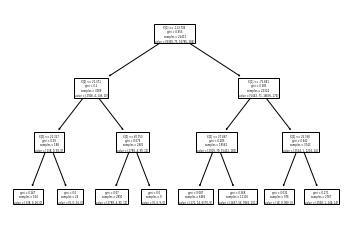

In [89]:
plot_tree(dt_model)

In [90]:
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dt_model.score(X_train, Y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))
print('F1 score of decision tree classifier on test set: {:.2f}'.format(f1_score(Y_test, dt_model.predict(X_test), average='weighted')))

Accuracy of decision tree classifier on train set: 0.86
Accuracy of decision tree classifier on test set: 0.86
F1 score of decision tree classifier on test set: 0.85


In [91]:
from sklearn.metrics import confusion_matrix
Y_pred = dt_model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[2294    0 1234    0]
 [   4    0   25    0]
 [ 162    0 7087    0]
 [   9    0   77    0]]


### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [94]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2,3
0,LAT,0.039213,-0.001510,-0.064149,0.026446
1,LON,-0.007235,0.018616,-0.031630,0.020250
2,SOG,-0.041946,0.018500,-0.079473,0.102919
3,Heading,0.000628,-0.002091,0.004568,-0.003104
4,acceleration,0.000234,-0.000007,-0.000156,-0.000070
5,bearing_rate,-0.000363,0.000082,0.000157,0.000124


In [95]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
print('F1 score of logistic regresssion classifier on test set: {:.2f}'.format(f1_score(Y_test, logreg.predict(X_test), average='weighted')))

Accuracy of logistic regression classifier on train set: 0.74
Accuracy of logistic regression classifier on test set: 0.74
F1 score of logistic regresssion classifier on test set: 0.72


In [96]:
from sklearn.metrics import confusion_matrix
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1466    0 2062    0]
 [  11    0   18    0]
 [ 639    0 6608    2]
 [  49    0   37    0]]


### Boosted

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [99]:
print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(ada.score(X_train, Y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(X_test, Y_test)))
print('F1 score of AdaBoost classifier on test set: {:.2f}'.format(f1_score(Y_test, ada.predict(X_test), average='weighted')))

Accuracy of AdaBoost classifier on train set: 0.81
Accuracy of AdaBoost classifier on test set: 0.81
F1 score of AdaBoost classifier on test set: 0.82


In [100]:
from sklearn.metrics import confusion_matrix
Y_pred = ada.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[2402    1  900  225]
 [   6    1   21    1]
 [ 726    0 6457   66]
 [  11    0   73    2]]
